# 2016-2017 NBA Playoff Prediction Using Random Forests



In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math
import io
import requests

%pylab inline

/Applications/Python/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/Python/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
X = pd.read_csv("nba.csv")

In [3]:
X

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff_berth,Champion
0,1,Golden State Warriors*,82,242.4,42.5,87.3,0.487,13.1,31.6,0.416,...,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,1,0
1,2,Oklahoma City Thunder*,82,241.8,41.1,86.4,0.476,8.3,23.7,0.349,...,35.6,48.6,23.0,7.4,5.9,15.9,20.6,110.2,1,0
2,3,Sacramento Kings,82,241.5,40.0,86.4,0.464,8.0,22.4,0.359,...,33.7,44.2,24.5,8.9,4.5,16.2,20.4,106.6,0,0
3,4,Houston Rockets*,82,241.8,37.7,83.5,0.452,10.7,30.9,0.347,...,31.7,43.1,22.2,10.0,5.2,15.9,21.8,106.5,1,0
4,5,Boston Celtics*,82,241.2,39.2,89.2,0.439,8.7,26.1,0.335,...,33.3,44.9,24.2,9.2,4.2,13.7,21.9,105.7,1,0
5,6,Portland Trail Blazers*,82,241.5,38.6,85.9,0.450,10.5,28.5,0.370,...,33.9,45.5,21.3,6.9,4.6,14.6,21.7,105.1,1,0
6,7,Los Angeles Clippers*,82,241.8,38.3,82.4,0.465,9.7,26.7,0.364,...,33.3,42.0,22.8,8.6,5.6,13.0,21.3,104.5,1,0
7,8,Cleveland Cavaliers*,82,242.1,38.7,84.0,0.460,10.7,29.6,0.362,...,33.9,44.5,22.7,6.7,3.9,13.6,20.3,104.3,1,1
8,9,Washington Wizards,82,240.9,39.5,85.8,0.460,8.6,24.2,0.358,...,32.8,41.8,24.5,8.6,3.9,14.5,20.8,104.1,0,0
9,10,San Antonio Spurs*,82,240.3,40.1,82.9,0.484,7.0,18.5,0.375,...,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,1,0


In [4]:
#Setting the feature we want to predict

y = X.pop('Playoff_berth')

In [5]:
y.describe()

count    30.000000
mean      0.533333
std       0.507416
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Playoff_berth, dtype: float64

# **EXPLORATORY DATA ANALYSIS OF 2015-2016 NBA PER GAME STATISTICS**

In [6]:
X.describe()

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,82.0,241.786667,38.230000,84.570000,0.452200,8.506667,24.083333,0.352767,29.720000,...,10.426667,33.343333,43.750000,22.286667,7.840000,4.950000,14.390000,20.256667,102.663333,0.033333
std,8.803408,0.0,0.822835,1.518427,2.056638,0.015884,1.713825,4.296998,0.017760,2.031035,...,1.092587,1.307982,1.712177,2.213241,0.984571,0.844761,1.168362,1.288860,3.788775,0.182574
min,1.000000,82.0,240.300000,35.100000,80.400000,0.414000,5.400000,15.600000,0.317000,26.400000,...,8.300000,30.500000,41.200000,18.000000,5.700000,3.700000,12.600000,17.500000,97.300000,0.000000
25%,8.250000,82.0,241.275000,37.250000,83.525000,0.440250,7.800000,21.675000,0.344250,28.025000,...,9.575000,32.575000,42.450000,20.900000,7.225000,4.200000,13.425000,19.525000,100.225000,0.000000
50%,15.500000,82.0,241.800000,38.300000,84.400000,0.450500,8.550000,23.850000,0.350000,29.550000,...,10.450000,33.300000,43.650000,22.250000,7.750000,4.950000,14.300000,20.500000,102.350000,0.000000
75%,22.750000,82.0,242.325000,38.675000,85.900000,0.463000,9.600000,27.300000,0.361500,31.550000,...,11.175000,33.900000,44.575000,23.325000,8.550000,5.700000,15.000000,20.975000,104.250000,0.000000
max,30.000000,82.0,244.000000,42.500000,89.200000,0.487000,13.100000,31.600000,0.416000,33.200000,...,13.100000,36.200000,48.600000,28.900000,10.000000,6.500000,17.200000,22.700000,114.900000,1.000000


In [7]:
print X.columns

Index([u'Rk', u'Team', u'G', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA',
       u'3P%', u'2P', u'2PA', u'2P%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB',
       u'TRB', u'AST', u'STL', u'BLK', u'TOV', u'PF', u'PTS', u'Champion'],
      dtype='object')


In [8]:
X.rename(columns={'FG%': 'FG_Percent'},inplace=True)
X.rename(columns={'3P%': '3P_Percent'},inplace=True)
X.rename(columns={'2P%': '2P_Percent'},inplace=True)
X.rename(columns={'FT%': 'FT_Percent'},inplace=True)
X.rename(columns={'3P': 'x3P'},inplace=True)
X.rename(columns={'3PA': 'x3PA'},inplace=True)
X.rename(columns={'2P': 'x2P'},inplace=True)
X.rename(columns={'2PA': 'x2PA'},inplace=True)

In [9]:
X

,Rk,Team,G,MP,FG,FGA,FG_Percent,x3P,x3PA,3P_Percent,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion
0,1,Golden State Warriors*,82,242.4,42.5,87.3,0.487,13.1,31.6,0.416,...,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,0
1,2,Oklahoma City Thunder*,82,241.8,41.1,86.4,0.476,8.3,23.7,0.349,...,13.1,35.6,48.6,23.0,7.4,5.9,15.9,20.6,110.2,0
2,3,Sacramento Kings,82,241.5,40.0,86.4,0.464,8.0,22.4,0.359,...,10.6,33.7,44.2,24.5,8.9,4.5,16.2,20.4,106.6,0
3,4,Houston Rockets*,82,241.8,37.7,83.5,0.452,10.7,30.9,0.347,...,11.3,31.7,43.1,22.2,10.0,5.2,15.9,21.8,106.5,0
4,5,Boston Celtics*,82,241.2,39.2,89.2,0.439,8.7,26.1,0.335,...,11.6,33.3,44.9,24.2,9.2,4.2,13.7,21.9,105.7,0
5,6,Portland Trail Blazers*,82,241.5,38.6,85.9,0.450,10.5,28.5,0.370,...,11.6,33.9,45.5,21.3,6.9,4.6,14.6,21.7,105.1,0
6,7,Los Angeles Clippers*,82,241.8,38.3,82.4,0.465,9.7,26.7,0.364,...,8.8,33.3,42.0,22.8,8.6,5.6,13.0,21.3,104.5,0
7,8,Cleveland Cavaliers*,82,242.1,38.7,84.0,0.460,10.7,29.6,0.362,...,10.6,33.9,44.5,22.7,6.7,3.9,13.6,20.3,104.3,1
8,9,Washington Wizards,82,240.9,39.5,85.8,0.460,8.6,24.2,0.358,...,9.1,32.8,41.8,24.5,8.6,3.9,14.5,20.8,104.1,0
9,10,San Antonio Spurs*,82,240.3,40.1,82.9,0.484,7.0,18.5,0.375,...,9.4,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,0


In [10]:
#Drop all irrelevant special characters from strings in columns to read better
X['Team'] = X.Team.str.replace('*','')

In [11]:
X

,Rk,Team,G,MP,FG,FGA,FG_Percent,x3P,x3PA,3P_Percent,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Champion
0,1,Golden State Warriors,82,242.4,42.5,87.3,0.487,13.1,31.6,0.416,...,10.0,36.2,46.2,28.9,8.4,6.1,15.2,20.7,114.9,0
1,2,Oklahoma City Thunder,82,241.8,41.1,86.4,0.476,8.3,23.7,0.349,...,13.1,35.6,48.6,23.0,7.4,5.9,15.9,20.6,110.2,0
2,3,Sacramento Kings,82,241.5,40.0,86.4,0.464,8.0,22.4,0.359,...,10.6,33.7,44.2,24.5,8.9,4.5,16.2,20.4,106.6,0
3,4,Houston Rockets,82,241.8,37.7,83.5,0.452,10.7,30.9,0.347,...,11.3,31.7,43.1,22.2,10.0,5.2,15.9,21.8,106.5,0
4,5,Boston Celtics,82,241.2,39.2,89.2,0.439,8.7,26.1,0.335,...,11.6,33.3,44.9,24.2,9.2,4.2,13.7,21.9,105.7,0
5,6,Portland Trail Blazers,82,241.5,38.6,85.9,0.450,10.5,28.5,0.370,...,11.6,33.9,45.5,21.3,6.9,4.6,14.6,21.7,105.1,0
6,7,Los Angeles Clippers,82,241.8,38.3,82.4,0.465,9.7,26.7,0.364,...,8.8,33.3,42.0,22.8,8.6,5.6,13.0,21.3,104.5,0
7,8,Cleveland Cavaliers,82,242.1,38.7,84.0,0.460,10.7,29.6,0.362,...,10.6,33.9,44.5,22.7,6.7,3.9,13.6,20.3,104.3,1
8,9,Washington Wizards,82,240.9,39.5,85.8,0.460,8.6,24.2,0.358,...,9.1,32.8,41.8,24.5,8.6,3.9,14.5,20.8,104.1,0
9,10,San Antonio Spurs,82,240.3,40.1,82.9,0.484,7.0,18.5,0.375,...,9.4,34.5,43.9,24.5,8.3,5.9,13.1,17.5,103.5,0


In [12]:
#X['TeamId'] = X.index

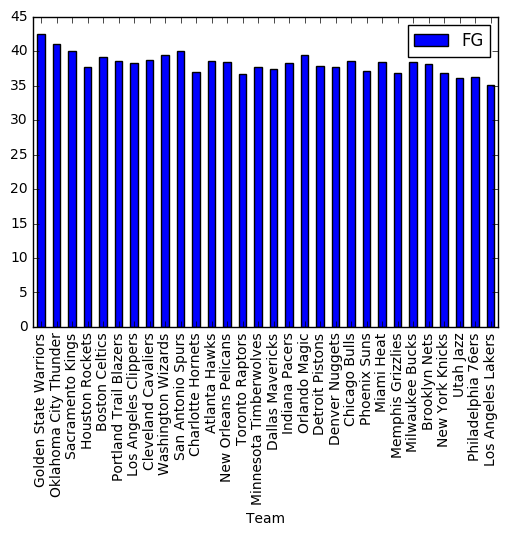

In [13]:
X.plot('Team', 'FG', kind = 'bar')

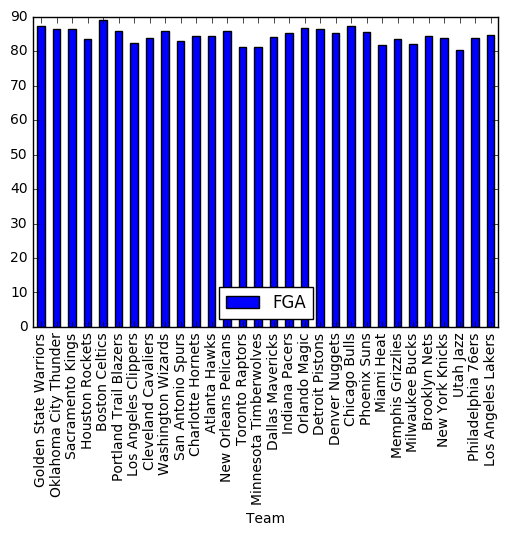

In [14]:
X.plot('Team', 'FGA', kind = 'bar')

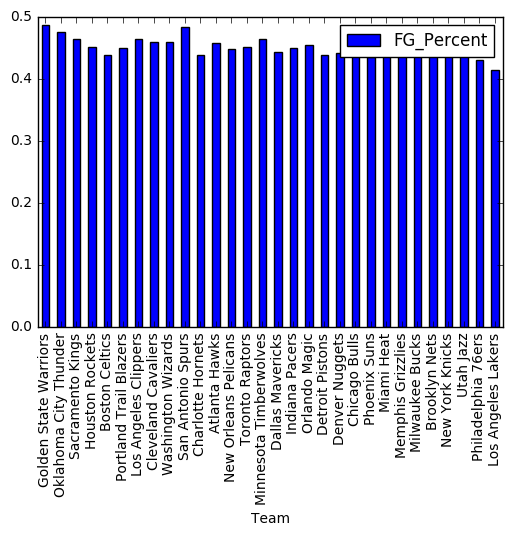

In [15]:
X.plot('Team', 'FG_Percent', kind = 'bar')

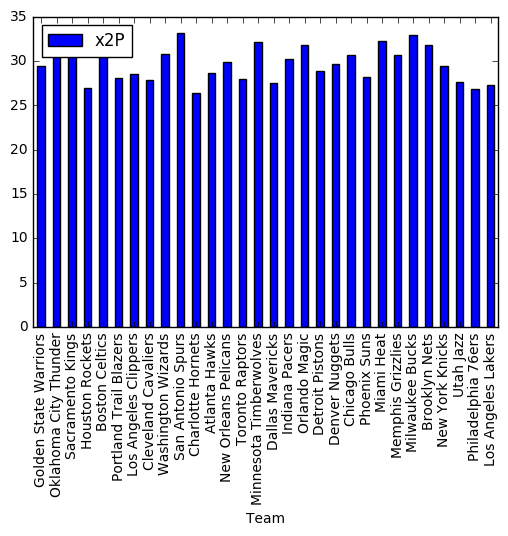

In [16]:
X.plot('Team', 'x2P', kind = 'bar')

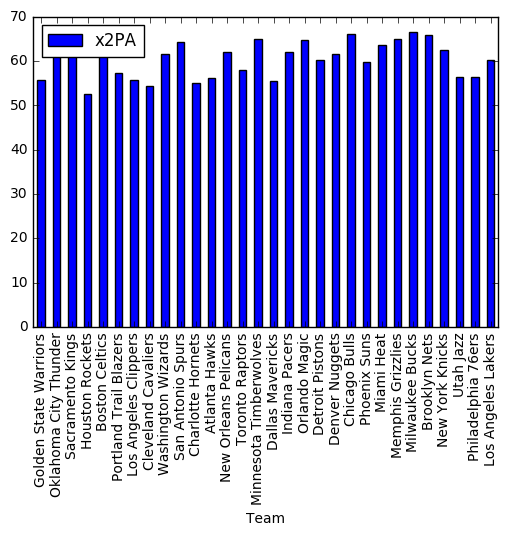

In [17]:
X.plot('Team', 'x2PA', kind = 'bar')

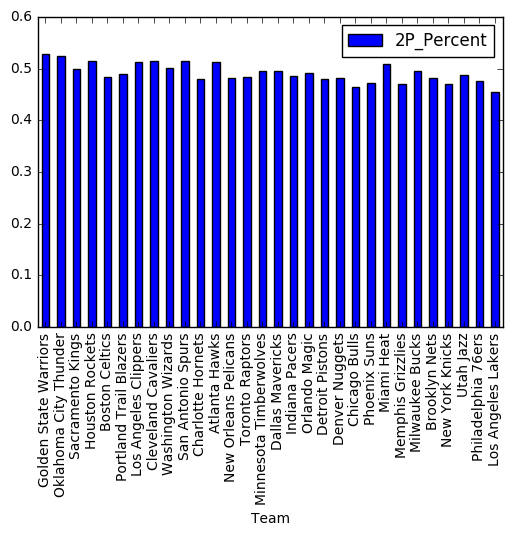

In [18]:
X.plot('Team', '2P_Percent', kind = 'bar')

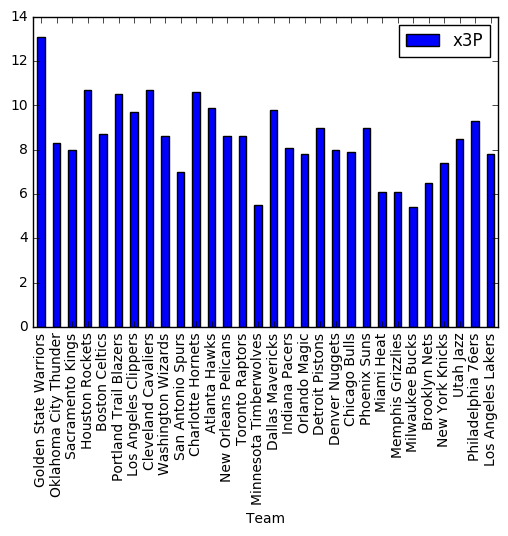

In [19]:
X.plot('Team', 'x3P', kind = 'bar')

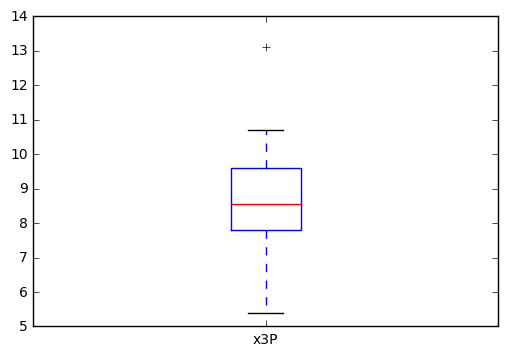

In [20]:
X.plot('Team', 'x3P', kind = 'box')

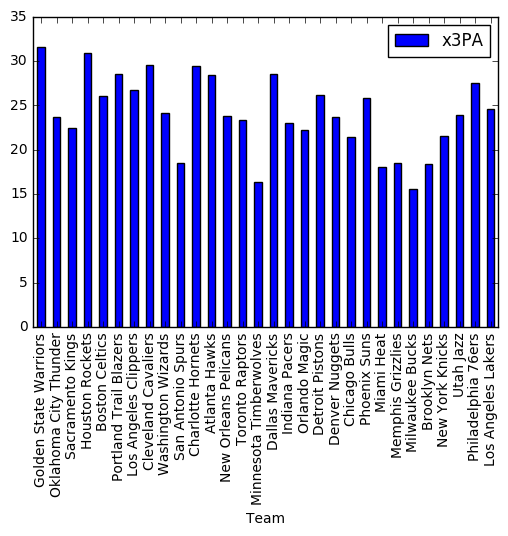

In [21]:
X.plot('Team', 'x3PA', kind = 'bar')

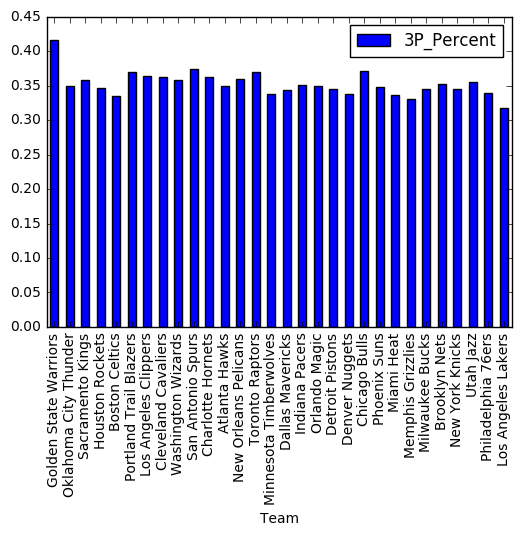

In [22]:
X.plot('Team', '3P_Percent', kind = 'bar')

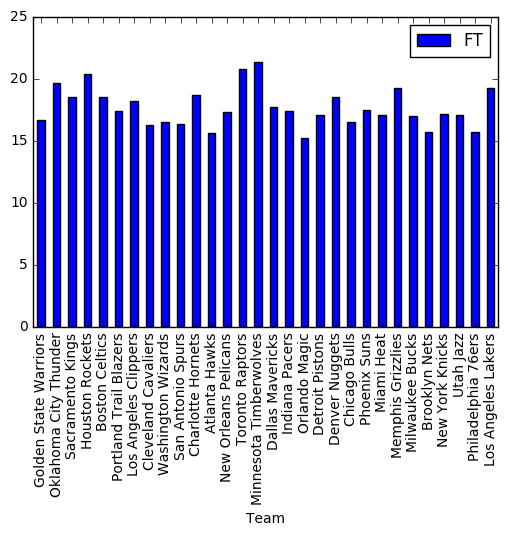

In [23]:
X.plot('Team', 'FT', kind = 'bar')

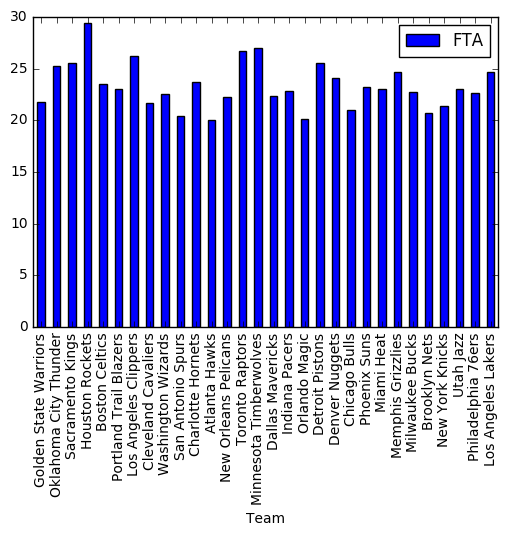

In [24]:
X.plot('Team', 'FTA', kind = 'bar')

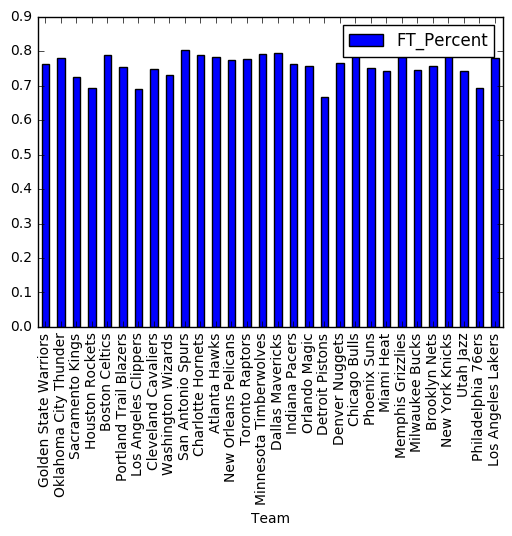

In [25]:
X.plot('Team', 'FT_Percent', kind = 'bar')

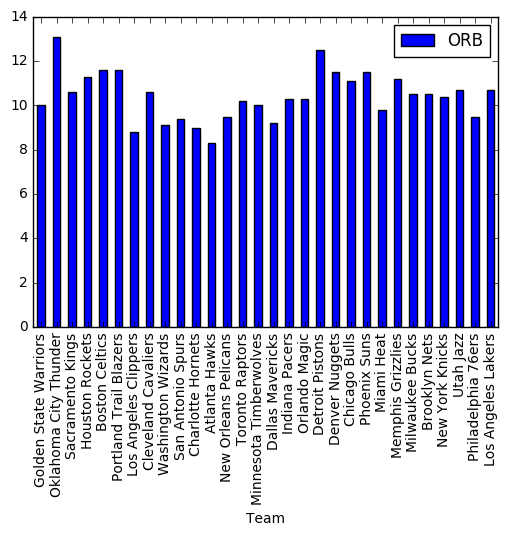

In [26]:
X.plot('Team', 'ORB', kind = 'bar')

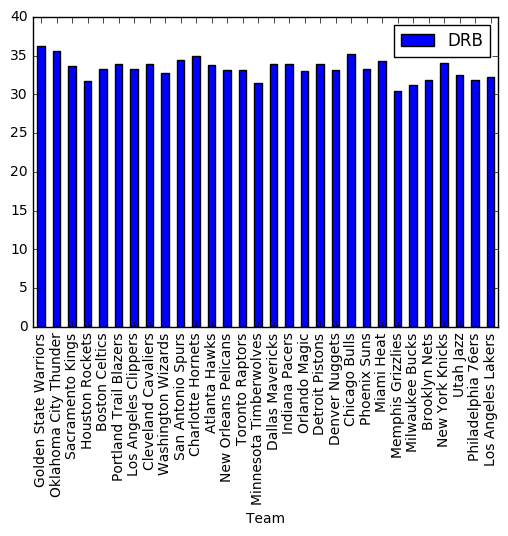

In [27]:
X.plot('Team', 'DRB', kind = 'bar')

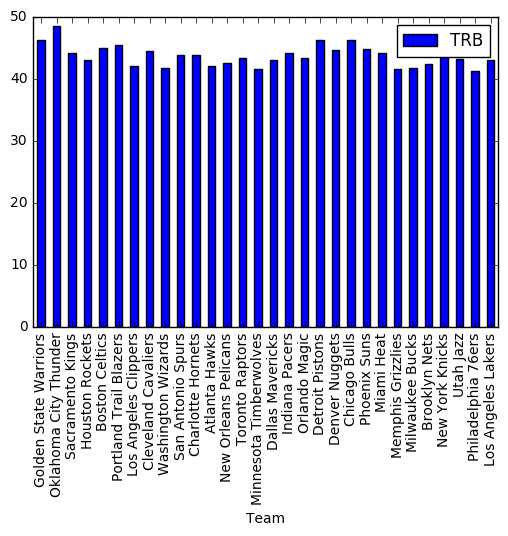

In [28]:
X.plot('Team', 'TRB', kind = 'bar')

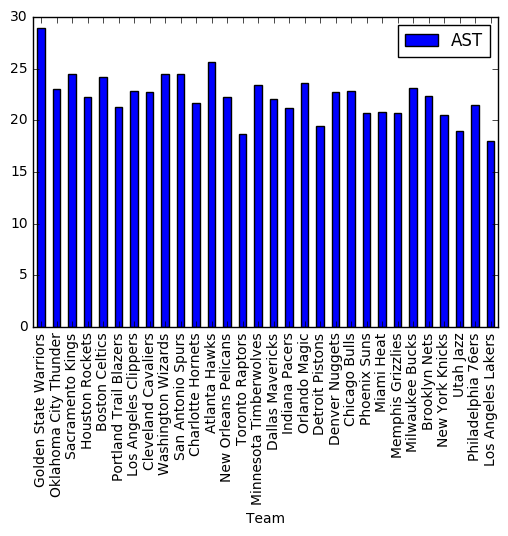

In [29]:
X.plot('Team', 'AST', kind = 'bar')

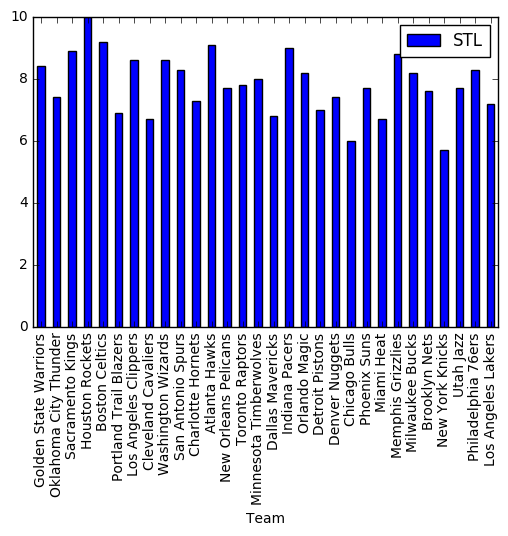

In [30]:
X.plot('Team', 'STL', kind = 'bar')

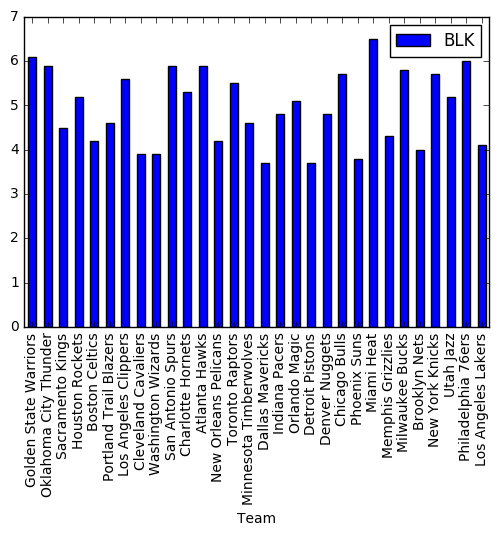

In [31]:
X.plot('Team', 'BLK', kind = 'bar')

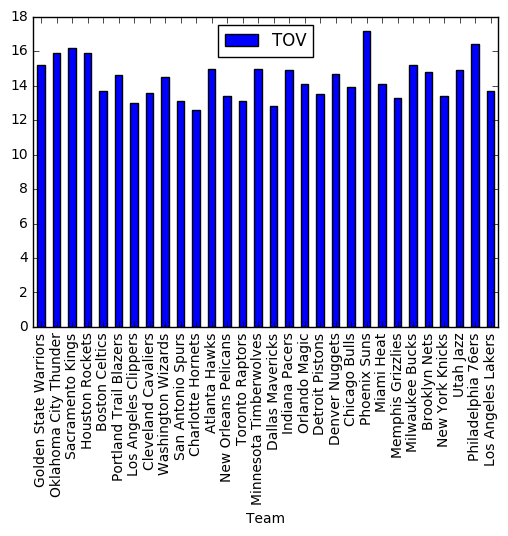

In [32]:
X.plot('Team', 'TOV', kind = 'bar')

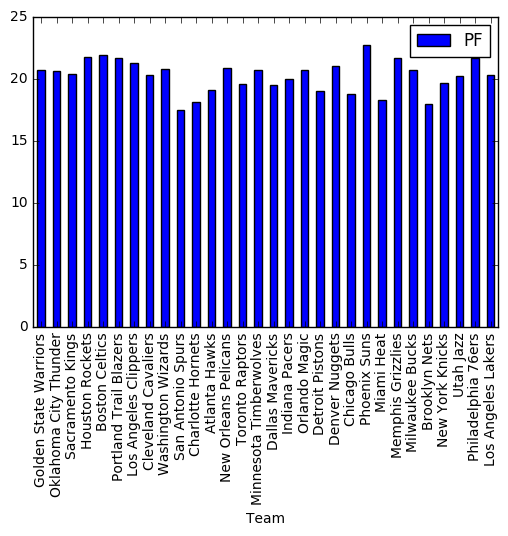

In [33]:
X.plot('Team', 'PF', kind = 'bar')

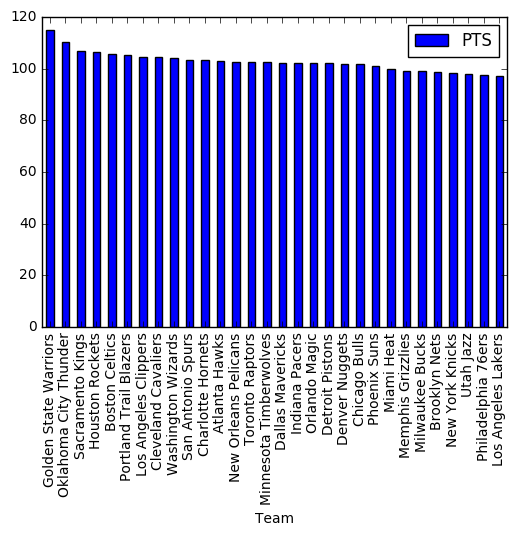

In [34]:
X.plot('Team', 'PTS', kind = 'bar')

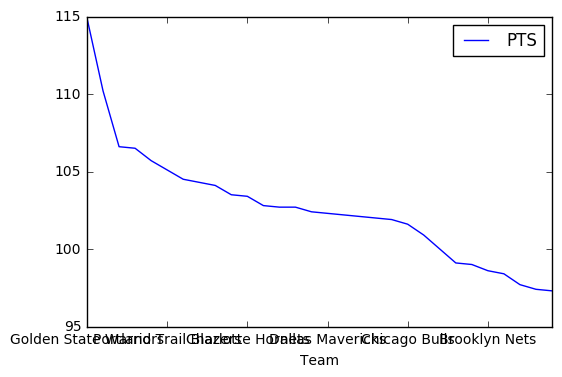

In [35]:
X.plot('Team', 'PTS')

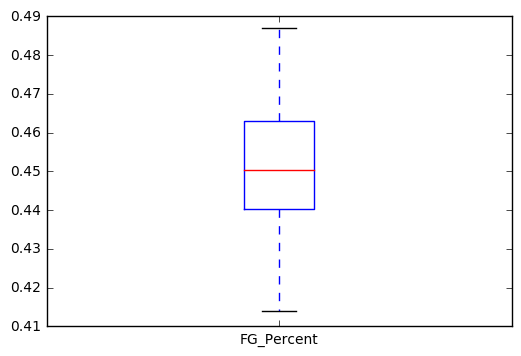

In [36]:
X.plot('Team', 'FG_Percent', kind = 'box')

In [37]:
#X.plot('Team', 'Playoff_berth', kind = 'bar')

In [38]:
X.FG.describe()

count    30.000000
mean     38.230000
std       1.518427
min      35.100000
25%      37.250000
50%      38.300000
75%      38.675000
max      42.500000
Name: FG, dtype: float64

In [39]:
X.FGA.describe()

count    30.000000
mean     84.570000
std       2.056638
min      80.400000
25%      83.525000
50%      84.400000
75%      85.900000
max      89.200000
Name: FGA, dtype: float64

In [40]:
X.FG_Percent.describe()

count    30.000000
mean      0.452200
std       0.015884
min       0.414000
25%       0.440250
50%       0.450500
75%       0.463000
max       0.487000
Name: FG_Percent, dtype: float64

In [41]:
X.x3P.describe()

count    30.000000
mean      8.506667
std       1.713825
min       5.400000
25%       7.800000
50%       8.550000
75%       9.600000
max      13.100000
Name: x3P, dtype: float64

In [42]:
X.x3PA.describe()

count    30.000000
mean     24.083333
std       4.296998
min      15.600000
25%      21.675000
50%      23.850000
75%      27.300000
max      31.600000
Name: x3PA, dtype: float64

In [43]:
X.FGA.describe()

count    30.000000
mean     84.570000
std       2.056638
min      80.400000
25%      83.525000
50%      84.400000
75%      85.900000
max      89.200000
Name: FGA, dtype: float64

In [44]:
X.FGA.describe()

count    30.000000
mean     84.570000
std       2.056638
min      80.400000
25%      83.525000
50%      84.400000
75%      85.900000
max      89.200000
Name: FGA, dtype: float64

# DATA CLEANING #

In [45]:
print X.columns

Index([u'Rk', u'Team', u'G', u'MP', u'FG', u'FGA', u'FG_Percent', u'x3P',
       u'x3PA', u'3P_Percent', u'x2P', u'x2PA', u'2P_Percent', u'FT', u'FTA',
       u'FT_Percent', u'ORB', u'DRB', u'TRB', u'AST', u'STL', u'BLK', u'TOV',
       u'PF', u'PTS', u'Champion'],
      dtype='object')


In [46]:
#Drop unnecessary columns that are irrelevant to predicting the champion
X = X.drop(['Team'], axis=1)
X = X.drop(['MP'], axis=1)
X = X.drop(['G'], axis=1)
X = X.drop(['Champion'], axis=1)

In [47]:
X.head

<bound method DataFrame.head of     Rk    FG   FGA  FG_Percent   x3P  x3PA  3P_Percent   x2P  x2PA  \
0    1  42.5  87.3       0.487  13.1  31.6       0.416  29.4  55.7   
1    2  41.1  86.4       0.476   8.3  23.7       0.349  32.9  62.6   
2    3  40.0  86.4       0.464   8.0  22.4       0.359  32.0  64.0   
3    4  37.7  83.5       0.452  10.7  30.9       0.347  27.0  52.6   
4    5  39.2  89.2       0.439   8.7  26.1       0.335  30.5  63.1   
5    6  38.6  85.9       0.450  10.5  28.5       0.370  28.1  57.4   
6    7  38.3  82.4       0.465   9.7  26.7       0.364  28.6  55.7   
7    8  38.7  84.0       0.460  10.7  29.6       0.362  27.9  54.4   
8    9  39.5  85.8       0.460   8.6  24.2       0.358  30.8  61.6   
9   10  40.1  82.9       0.484   7.0  18.5       0.375  33.2  64.4   
10  11  37.0  84.4       0.439  10.6  29.4       0.362  26.4  55.0   
11  12  38.6  84.4       0.458   9.9  28.4       0.350  28.7  56.1   
12  13  38.5  85.9       0.448   8.6  23.8       0.360  29

# Implementing the Random Forest Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [49]:
# from sklearn.multiclass import OneVsRestClassifier  < Don't need this, only 2 classes
from sklearn.svm import LinearSVC  # you can use this though :)
from sklearn.metrics import confusion_matrix

In [50]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.predict_proba(X)[:,1]))  #note the change here, use this when using AUC and classifiers

('C-stat: ', 1.0)


In [51]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
yhat = model.predict(X)
print "C-stat: ", roc_auc_score(y, yhat)

C-stat:  1.0


In [52]:
### Grid Search
n_estimators = [75]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [53]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [75]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [54]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=75, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [55]:
best_rfc = estimator.best_estimator_

In [56]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.666666666667


In [57]:
y_hat = best_rfc.predict(X_test)

In [58]:
y_hat

array([0, 1, 0, 0, 1, 1])

In [59]:
y_test

27    0
15    1
23    1
17    0
8     0
9     1
Name: Playoff_berth, dtype: int64

In [60]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.666666666667


In [61]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.67      0.67      0.67         3
          1       0.67      0.67      0.67         3

avg / total       0.67      0.67      0.67         6



In [62]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[2 1]
 [1 2]]


In [63]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.666666666667


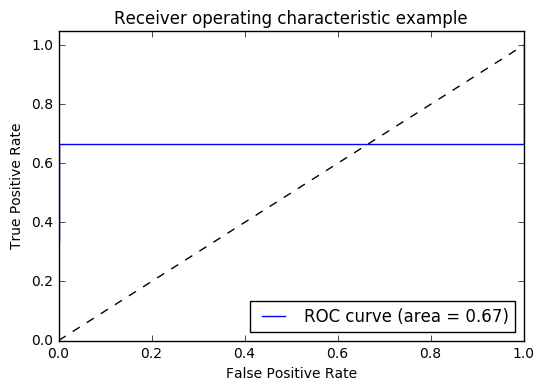

In [64]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [65]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, X, y, cv=10)

In [66]:
scores

array([ 0.5 ,  0.75,  1.  ,  0.5 ,  1.  ,  1.  ,  0.5 ,  1.  ,  0.5 ,  0.5 ])

In [67]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.725000 +/-  0.168705
95 percent probability that if this experiment were repeated over and over the average score would be between 0.556295 and 0.893705


In [68]:
from sklearn.model_selection import KFold, cross_val_score

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
model = RandomForestClassifier(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print "C-stat: ", roc_auc_score(y, model.predict(X))

C-stat:  1.0


In [99]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
yhat = model.predict(X)
print "C-stat: ", roc_auc_score(y, yhat)

C-stat:  1.0


In [100]:
model.feature_importances_

array([ 0.05932906,  0.01115747,  0.02756579,  0.01549764,  0.0749977 ,
        0.06153336,  0.0287149 ,  0.01202517,  0.05305754,  0.05545782,
        0.00936335,  0.02014102,  0.01098913,  0.01647044,  0.22727796,
        0.01593315,  0.00171875,  0.07665315,  0.00605766,  0.111581  ,
        0.01247986,  0.09199808])

/Applications/Python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


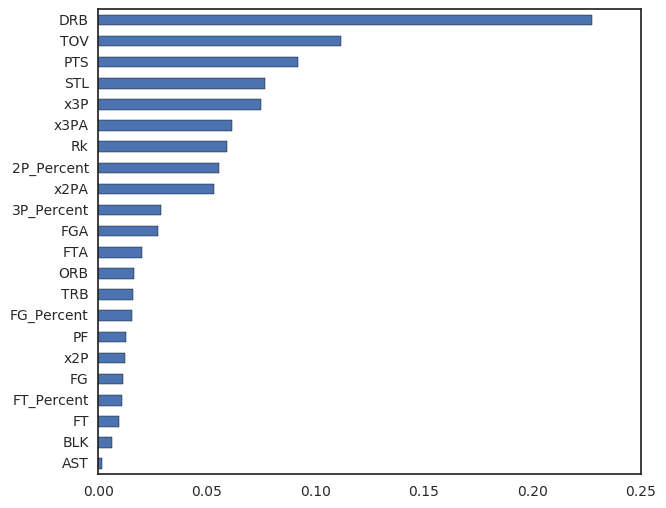

In [101]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(7,6));

/Applications/Python/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


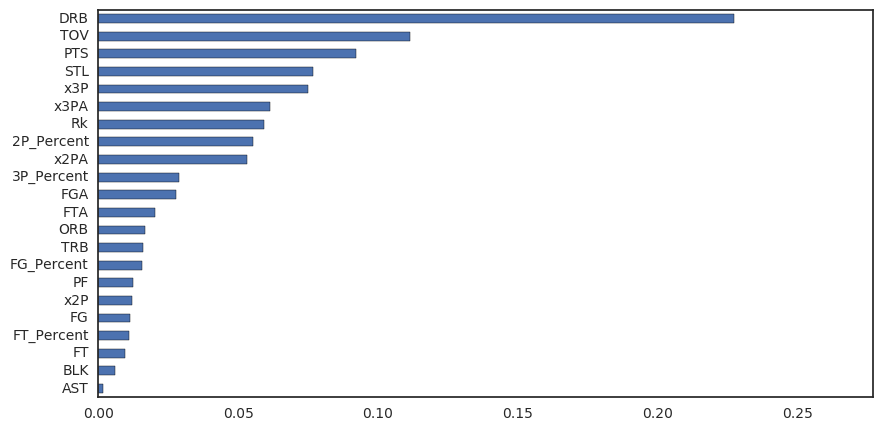

In [102]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):
     
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, X.columns)

In [103]:
import seaborn as sns

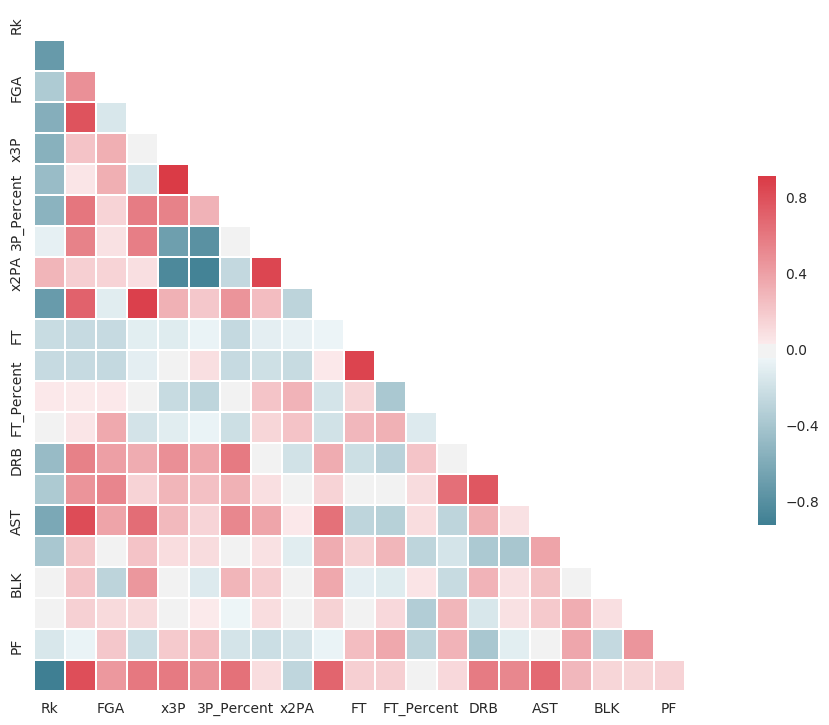

In [104]:
sns.set(style="white")

#Computing the Corelation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=2,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# N_jobs

In [105]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 4.58 s per loop


In [106]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1 loop, best of 3: 5.57 s per loop


# N_estimators

30 trees
C-stat:  0.747767857143

50 trees
C-stat:  0.745535714286

100 trees
C-stat:  0.71875

200 trees
C-stat:  0.720982142857

500 trees
C-stat:  0.723214285714

1000 trees
C-stat:  0.745535714286

2000 trees
C-stat:  0.75



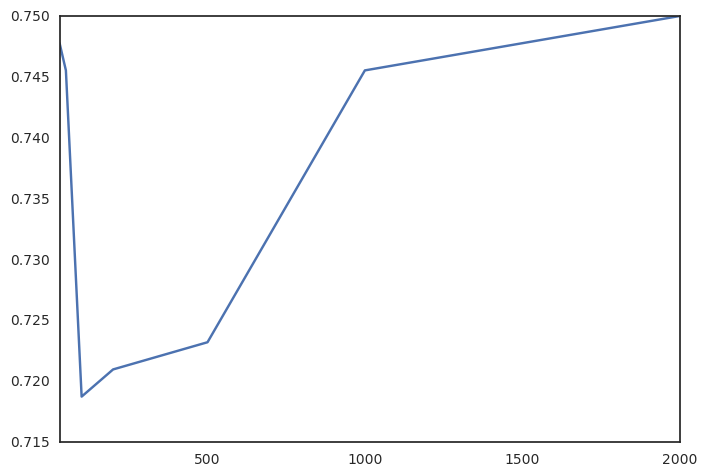

In [107]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

# Max features

auto option
C-stat:  0.745535714286

None option
C-stat:  0.745535714286

sqrt option
C-stat:  0.776785714286

log2 option
C-stat:  0.776785714286

0.9 option
C-stat:  0.741071428571

0.2 option
C-stat:  0.776785714286



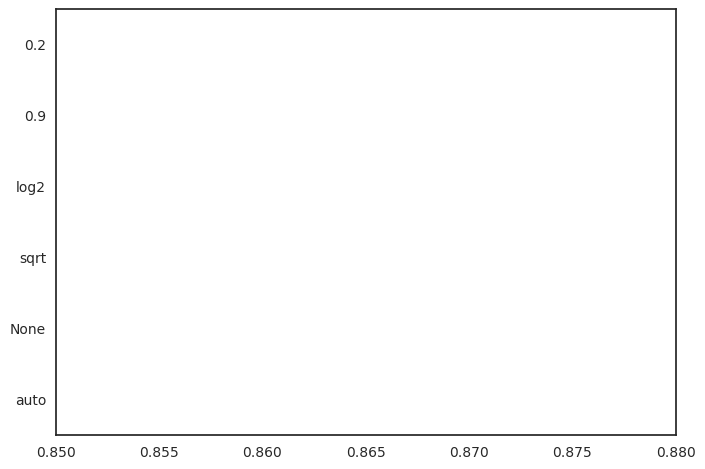

In [108]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

# Min Samples Leaf

1 min samples
C-stat:  0.745535714286

2 min samples
C-stat:  0.696428571429

3 min samples
C-stat:  0.6875

4 min samples
C-stat:  0.674107142857

5 min samples
C-stat:  0.696428571429

6 min samples
C-stat:  0.705357142857

7 min samples
C-stat:  0.683035714286

8 min samples
C-stat:  0.678571428571

9 min samples
C-stat:  0.647321428571

10 min samples
C-stat:  0.540178571429



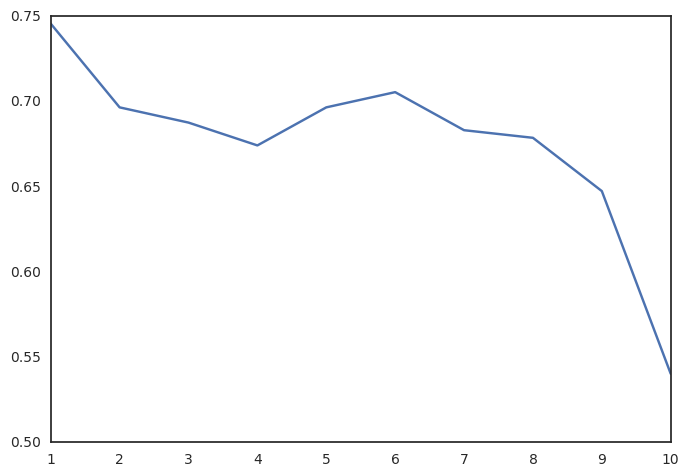

In [109]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(X, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();

# Final Model

In [110]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc

C-stat:  0.696428571429


In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [112]:
### Grid Search
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [113]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [114]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [115]:
best_rfc = estimator.best_estimator_

In [116]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.833333333333


In [117]:
y_hat = best_rfc.predict(X_test)

In [118]:
y_hat

array([0, 1, 0, 0, 0, 1])

In [119]:
y_test

27    0
15    1
23    1
17    0
8     0
9     1
Name: Playoff_berth, dtype: int64

In [120]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.833333333333


In [121]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      0.67      0.80         3

avg / total       0.88      0.83      0.83         6



In [122]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[3 0]
 [1 2]]


In [123]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.666666666667


# TESTING MODEL AGAINST TEST DATA


In [124]:
df = pd.read_csv("nbatest.csv")

In [125]:
df

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff_berth
0,1,Golden State Warriors,23,242.2,43.8,87.4,0.501,12.0,31.7,0.380,...,9.5,35.2,44.7,31.8,9.7,6.6,14.8,20.3,119.3,1
1,2,Portland Trail Blazers,24,243.1,39.7,87.9,0.452,11.0,30.2,0.363,...,9.6,33.3,43.0,22.2,6.9,4.8,13.3,22.7,109.1,1
2,3,Los Angeles Lakers,24,240.0,38.9,87.1,0.447,8.5,24.7,0.343,...,11.8,32.5,44.3,20.8,8.6,3.5,16.4,20.8,104.5,0
3,4,Los Angeles Clippers,23,242.2,38.6,83.7,0.461,9.9,26.6,0.372,...,9.7,34.4,44.2,22.0,8.8,4.8,12.9,20.8,108.3,1
4,5,Houston Rockets,22,242.3,40.5,86.3,0.469,14.0,37.0,0.377,...,11.5,32.8,44.3,24.6,8.0,5.0,16.3,20.1,112.2,1
5,6,Toronto Raptors,22,241.1,40.5,84.8,0.478,9.6,24.4,0.393,...,10.8,31.4,42.2,20.5,8.9,4.6,12.0,21.5,111.5,1
6,7,Denver Nuggets,23,243.3,38.3,88.5,0.432,9.2,26.1,0.351,...,13.3,36.3,49.6,21.4,6.7,4.3,16.8,21.0,105.5,0
7,8,Utah Jazz,24,240.0,36.4,78.5,0.463,9.5,26.7,0.358,...,8.1,34.1,42.2,19.1,6.3,5.2,12.5,19.6,100.3,1
8,9,Detroit Pistons,24,240.0,39.3,87.1,0.451,7.1,20.8,0.342,...,9.6,35.4,45.0,21.0,6.9,4.2,11.7,17.3,99.2,1
9,10,Oklahoma City Thunder,22,244.5,40.6,88.4,0.460,8.9,26.0,0.340,...,10.6,35.5,46.1,22.6,7.8,5.2,15.8,20.9,107.4,1


In [126]:
df.rename(columns={'FG%': 'FG_Percent'},inplace=True)
df.rename(columns={'3P%': '3P_Percent'},inplace=True)
df.rename(columns={'2P%': '2P_Percent'},inplace=True)
df.rename(columns={'FT%': 'FT_Percent'},inplace=True)
df.rename(columns={'3P': 'x3P'},inplace=True)
df.rename(columns={'3PA': 'x3PA'},inplace=True)
df.rename(columns={'2P': 'x2P'},inplace=True)
df.rename(columns={'2PA': 'x2PA'},inplace=True)

In [127]:
#df['TeamId'] = df.index

In [128]:
df

,Rk,Team,G,MP,FG,FGA,FG_Percent,x3P,x3PA,3P_Percent,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff_berth
0,1,Golden State Warriors,23,242.2,43.8,87.4,0.501,12.0,31.7,0.380,...,9.5,35.2,44.7,31.8,9.7,6.6,14.8,20.3,119.3,1
1,2,Portland Trail Blazers,24,243.1,39.7,87.9,0.452,11.0,30.2,0.363,...,9.6,33.3,43.0,22.2,6.9,4.8,13.3,22.7,109.1,1
2,3,Los Angeles Lakers,24,240.0,38.9,87.1,0.447,8.5,24.7,0.343,...,11.8,32.5,44.3,20.8,8.6,3.5,16.4,20.8,104.5,0
3,4,Los Angeles Clippers,23,242.2,38.6,83.7,0.461,9.9,26.6,0.372,...,9.7,34.4,44.2,22.0,8.8,4.8,12.9,20.8,108.3,1
4,5,Houston Rockets,22,242.3,40.5,86.3,0.469,14.0,37.0,0.377,...,11.5,32.8,44.3,24.6,8.0,5.0,16.3,20.1,112.2,1
5,6,Toronto Raptors,22,241.1,40.5,84.8,0.478,9.6,24.4,0.393,...,10.8,31.4,42.2,20.5,8.9,4.6,12.0,21.5,111.5,1
6,7,Denver Nuggets,23,243.3,38.3,88.5,0.432,9.2,26.1,0.351,...,13.3,36.3,49.6,21.4,6.7,4.3,16.8,21.0,105.5,0
7,8,Utah Jazz,24,240.0,36.4,78.5,0.463,9.5,26.7,0.358,...,8.1,34.1,42.2,19.1,6.3,5.2,12.5,19.6,100.3,1
8,9,Detroit Pistons,24,240.0,39.3,87.1,0.451,7.1,20.8,0.342,...,9.6,35.4,45.0,21.0,6.9,4.2,11.7,17.3,99.2,1
9,10,Oklahoma City Thunder,22,244.5,40.6,88.4,0.460,8.9,26.0,0.340,...,10.6,35.5,46.1,22.6,7.8,5.2,15.8,20.9,107.4,1


In [129]:
#Drop unnecessary columns that are irrelevant to predicting the champion
df = df.drop(['Team'], axis=1)
df = df.drop(['MP'], axis=1)
df = df.drop(['G'], axis=1)
df = df.drop(['Playoff_berth'], axis=1)

In [130]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.833333333333


In [131]:
y_hat = best_rfc.predict(df)

In [132]:
y_hat

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0])

In [133]:
y_test

27    0
15    1
23    1
17    0
8     0
9     1
Name: Playoff_berth, dtype: int64

In [134]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

yr = correct / float(total)
print yr

0.5


In [135]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86         3
          1       1.00      0.67      0.80         3

avg / total       0.88      0.83      0.83         6



In [136]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.666666666667


In [137]:
rf = RandomForestClassifier(n_estimators=120, n_jobs=-1)
rf.fit(df, y_hat)

predictions = rf.predict_proba(df)
print predictions

[[ 0.03333333  0.96666667]
 [ 0.03333333  0.96666667]
 [ 0.13333333  0.86666667]
 [ 0.01666667  0.98333333]
 [ 0.00833333  0.99166667]
 [ 0.04166667  0.95833333]
 [ 0.15833333  0.84166667]
 [ 0.05        0.95      ]
 [ 0.89166667  0.10833333]
 [ 0.05833333  0.94166667]
 [ 0.18333333  0.81666667]
 [ 0.86666667  0.13333333]
 [ 0.15        0.85      ]
 [ 0.84166667  0.15833333]
 [ 0.01666667  0.98333333]
 [ 0.125       0.875     ]
 [ 0.08333333  0.91666667]
 [ 0.825       0.175     ]
 [ 0.13333333  0.86666667]
 [ 0.175       0.825     ]
 [ 0.91666667  0.08333333]
 [ 0.79166667  0.20833333]
 [ 0.05        0.95      ]
 [ 0.06666667  0.93333333]
 [ 0.9         0.1       ]
 [ 0.925       0.075     ]
 [ 0.775       0.225     ]
 [ 0.825       0.175     ]
 [ 0.08333333  0.91666667]
 [ 0.90833333  0.09166667]]


In [138]:
# predict class labels for the test set
predicted = rf.predict(df)
print predicted

[1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0]


In [139]:
kdf = pd.DataFrame({
        "Rk": df["Rk"],
        "y": y_hat
    })

In [140]:
kdf.to_csv("NBA_Playoff_Prediction_RandomForest_Results_1.csv", index=False)